<a href="https://colab.research.google.com/github/prakharg317/IPL-match-win-prediction/blob/main/Brain_tumor_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Load Module

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
#Prepare/collect data

In [4]:
import os

path = os.listdir('sample_data/')
classes = {'no_tumor':0, 'tumor':1}

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    pth = ''+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [7]:
np.unique(Y)

array([0, 1])

In [8]:
pd.Series(Y).value_counts()

1    115
0    105
dtype: int64

In [9]:
X.shape, X_updated.shape

((220, 200, 200), (220, 40000))

In [13]:
#Visualize data

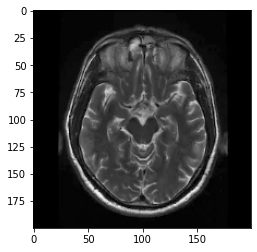

In [10]:
plt.imshow(X[0], cmap='gray')

In [14]:
#Prepare data

In [15]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(220, 40000)

In [16]:
#Split Data

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [18]:
xtrain.shape, xtest.shape

((176, 40000), (44, 40000))

In [19]:
#Feature Scaling

In [20]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [21]:
#Feature Selection: PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(176, 40000) (44, 40000)


In [26]:
print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

(176, 40000) (44, 40000)


In [27]:
#Train Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [29]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [30]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [31]:
#Evaluation

In [32]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.75


In [33]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9375
Testing Score: 0.7272727272727273


In [34]:
#Prediction

In [37]:
pred = sv.predict(xtest)
pred

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [38]:
misclassified=np.where(ytest!=pred)
misclassified

(array([13, 18, 21, 30, 31, 34, 35, 36, 38, 39, 41, 43]),)

In [39]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  12
0 1


In [40]:
#TEST MODEL

In [41]:
dec = {0:'No Tumor', 1:'Positive Tumor'}


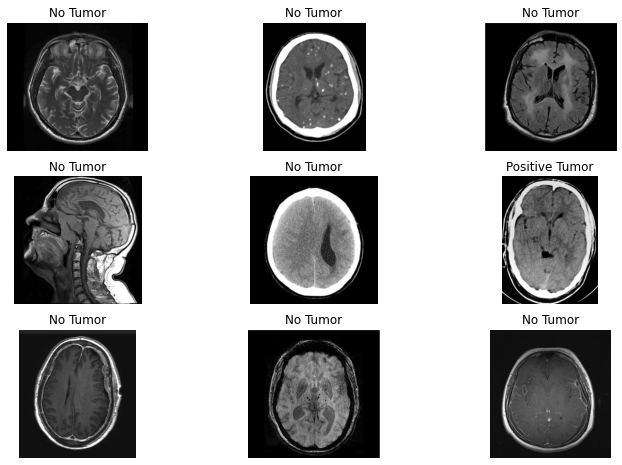

In [46]:
plt.figure(figsize=(12,8))
p = os.listdir('sample_data/')
c=1
for i in os.listdir('no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

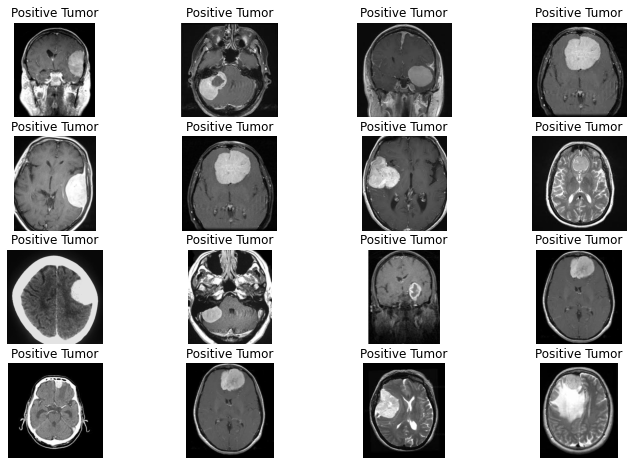

In [47]:
plt.figure(figsize=(12,8))
p = os.listdir('sample_data/')
c=1
for i in os.listdir('tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1